#  <font face="黑体"><center>Python 数据分析大作业--1班-1825101001-张三</center></font>

## 1.引言

&ensp;&ensp;基于作业要求，此报告确认为本人独立完成，主要实现内容包括如下：
    
1. 数据来源
    1. 老师提供的所有数据数据，包括：全标题、摘要、回帖、论坛、股票价格
    1. 下载的数据，包括：a.csv， 数据来源为: http://www.abc.com/m.html
    1. xxxxx


2. 处理流程包括
    1. 数据清洗
    1. 数据对齐
    1. 特征提取
    1. 模型训练
    1. xxx


3. 调用的第三方模块包括：
    1. pandas
    1. numpy
    1. xxx


4. 主要结论为：
    1. 数据清洗
    1. 数据对齐


## 2.数据清洗

导入所有模块

In [1]:
import pandas as pd
import sklearn
import xlrd
import numpy as np

### 2.1 处理全标题数据

In [2]:
def read_xlsx(xlsx_path):
    data_xsls = xlrd.open_workbook(xlsx_path) 
    sheet1 = data_xsls.sheets()[0]  
    # print(sheet_name)
    nrows = sheet1.nrows
    # print('表格总行数',nrows)
    ncols = sheet1.ncols
    # print('表格总列数',ncols)
    data = []
    for i in range(nrows):
        row_values = sheet1.row_values(i)
        data.append(row_values)
    return data

In [3]:
xlsx_path = './全标题.xlsx'
dfa = read_xlsx(xlsx_path)
dfa = np.array(dfa)
print(dfa.shape)
print(dfa[340])

(17929, 7)
['Donovan Jones - Positions For 2019 - Big Tech IPOs At The Ready'
 'https://seekingalpha.com/article/4228716-donovan-jones-positions-2019-big-tech-ipos-ready'
 "Editors' Pick " ' UBER' ' Dec. 21, 2018, 10:00 AM ' ' Donovan Jones'
 '2\xa0Comments']


In [4]:
# 删除无关信息，进行数据对齐
for i in range(dfa.shape[0]):
    if dfa[i][2] == "Editors' Pick ":
        dfa[i][2] = dfa[i][3]
        dfa[i][3] = dfa[i][4]
        dfa[i][4] = dfa[i][5]
        dfa[i][5] = dfa[i][6]

In [5]:
# 检验数据对齐结果
print(dfa[976][2])
print(dfa.shape)

 TST
(17929, 7)


In [6]:
Title_data = dfa[:,0:6]  # 对齐后的有效数据
print(Title_data.shape)

(17929, 6)


In [69]:
Title_df = pd.DataFrame(Title_data)
Title_df.head()

,0,1,2,3,4,5
0,标题,字段1_链接_链接,ABOUT,TIME,AUTHOR,COMMENTS
1,Micron Technology: Insanely Cheap Stock Given ...,https://seekingalpha.com/article/4230920-micro...,MU,"Dec. 31, 2018, 7:57 PM",Ruerd Heeg,75 Comments
2,Molson Coors Seems Attractive At These Valuations,https://seekingalpha.com/article/4230922-molso...,TAP,"Dec. 31, 2018, 7:44 PM",Sanjit Deepalam,16 Comments
3,Gerdau: The Brazilian Play On U.S. Steel,https://seekingalpha.com/article/4230917-gerda...,GGB,"Dec. 31, 2018, 7:10 PM",Shannon Bruce,1 Comment
4,Will Apple Get Its Mojo Back?,https://seekingalpha.com/article/4230908-will-...,AAPL,"Dec. 31, 2018, 5:36 PM",TipRanks,68 Comments


In [70]:
Title_df.nunique()

0    17922
1    17929
2     6623
3    17276
4     1934
5      584
dtype: int64

### 2.2 处理摘要数据

In [72]:
xlsx_path = './摘要.xlsx'
Abstract_data = read_xlsx(xlsx_path)
Abstract_data = np.array(Abstract_data)
print(Abstract_data.shape)
Abstract_df = pd.DataFrame(Abstract_data)

(10132, 4)


In [73]:
Abstract_df.head()

,0,1,2,3
0,标题,字段2,字段5,字段1
1,HealthEquity: Strong Growth May Be Slowing Hea...,"Apr. 1, 2019 10:46 PM ET","| About: HealthEquity, Inc. (HQY)",SummaryHealthEquity’s revenue and earnings hav...
2,Valero May Rally Up To 40% Within The Next 12 ...,"Apr. 1, 2019 10:38 PM ET",| About: Valero Energy Corporation (VLO),SummaryValero is ideally positioned to benefit...
3,Apple Makes A China Move,"Apr. 1, 2019 7:21 PM ET",| About: Apple Inc. (AAPL),SummaryCompany cuts prices on many key product...
4,Polaris Industries: Ready To Rally,"Apr. 1, 2019 7:14 PM ET",| About: Polaris Industries Inc. (PII),SummaryPolaris is a well-respected brand name ...


In [77]:
merge_df=pd.merge(Title_df, Abstract_df, on=0)
merge_df.head()

,0,1_x,2_x,3_x,4,5,1_y,2_y,3_y
0,标题,字段1_链接_链接,ABOUT,TIME,AUTHOR,COMMENTS,字段2,字段5,字段1
1,Micron Technology: Insanely Cheap Stock Given ...,https://seekingalpha.com/article/4230920-micro...,MU,"Dec. 31, 2018, 7:57 PM",Ruerd Heeg,75 Comments,"Dec. 31, 2018 7:57 PM ET","| About: Micron Technology, Inc. (MU), Include...","SummaryLast year, a combination of relatively ..."
2,Molson Coors Seems Attractive At These Valuations,https://seekingalpha.com/article/4230922-molso...,TAP,"Dec. 31, 2018, 7:44 PM",Sanjit Deepalam,16 Comments,"Dec. 31, 2018 7:44 PM ET",| About: Molson Coors Brewing Company (TAP),SummaryMolson Coors's stock has fallen over 30...
3,Gerdau: The Brazilian Play On U.S. Steel,https://seekingalpha.com/article/4230917-gerda...,GGB,"Dec. 31, 2018, 7:10 PM",Shannon Bruce,1 Comment,"Dec. 31, 2018 7:10 PM ET",| About: Gerdau S.A. (GGB),"SummaryGerdau is delivering good results, incl..."
4,Will Apple Get Its Mojo Back?,https://seekingalpha.com/article/4230908-will-...,AAPL,"Dec. 31, 2018, 5:36 PM",TipRanks,68 Comments,"Dec. 31, 2018 5:36 PM ET",| About: Apple Inc. (AAPL),SummaryApple has been resting on a reputation ...


### 2.3 处理回帖数据

### 2.4 处理论坛数据

In [8]:
from math import isnan
data_path = './论坛.csv'
forum_data =pd.read_csv(data_path)
forum_df = pd.DataFrame(forum_data)
# dis_data = np.array(dis_data)
print(forum_df.shape)
print(forum_df.isnull().sum())

(25117, 4)
字段1          0
字段2          0
字段3          0
字段4_链接    2920
dtype: int64


In [9]:
# 删除缺失值
forum_df = forum_df[forum_df['字段4_链接'].notna()]
print(forum_df.shape)

(22197, 4)


In [10]:
forum_df.head()

,字段1,字段2,字段3,字段4_链接
0,ComputerBlue,31-Dec-18,Let's create a small spec POS portfolio $COTY ...,https://seekingalpha.com/symbol/COTY
1,Darren McCammon,31-Dec-18,"$RICK ""Now that we've reported results, we'll ...",https://seekingalpha.com/symbol/RICK
2,Jonathan Cooper,31-Dec-18,Do any $APHA shareholders support the $GGB tak...,https://seekingalpha.com/symbol/APHA
3,lstasel,31-Dec-18,Long on $T . Even if it means smaller dividend...,https://seekingalpha.com/symbol/T
4,Nicholas Ward,31-Dec-18,"2018 was a down year for me, but I'm happy to ...",https://seekingalpha.com/symbol/SPY


### 2.5 处理股票价格数据 

In [11]:
from math import isnan
data_path = './股票价格.csv'
share_data =pd.read_csv(data_path)
share_df = pd.DataFrame(share_data)
# dis_data = np.array(dis_data)
print(share_df.shape)
print("数据缺失情况：")
print(share_df.isnull().sum())

(941518, 9)
数据缺失情况：
PERMNO         0
date           0
TICKER      1271
COMNAM        14
BIDLO       1647
ASKHI       1647
PRC         1647
VOL         1647
OPENPRC    34105
dtype: int64


In [12]:
# 删除缺失值
share_df = share_df[share_df['OPENPRC'].notna()]
print(share_df.shape)

(907413, 9)


In [13]:
orghead = share_df.head(0)
print(orghead)

Empty DataFrame
Columns: [PERMNO, date, TICKER, COMNAM, BIDLO, ASKHI, PRC, VOL, OPENPRC]
Index: []


In [14]:
date_data = str(share_df.iloc[1]['date'])
print(date_data)
year_date = date_data[0:4]
print(year_date)
month_date = date_data[4:6]
print(month_date)
day_date = date_data[6:8]
date = year_date + '-' + month_date + '-' + day_date
print(date)

20180703
2018
07
2018-07-03


In [15]:
# 处理时间数据
share_df = np.array(share_df)
for i in range(share_df.shape[0]):
    # print(share_df[i,1])
    date_data = str(share_df[i,1])
    #print(date_data)
    year_date = date_data[0:4]
    #print(year_date)
    month_date = date_data[4:6]
    # print(month_date)
    day_date = date_data[6:8]
    date = year_date + '-' + month_date + '-' + day_date
    #print(date)
    share_df[i,1] = date

In [16]:
share_df = pd.DataFrame(share_df)
share_df.head()

,0,1,2,3,4,5,6,7,8
0,10026,2018-07-02,JJSF,J & J SNACK FOODS CORP,150.7,153.275,152.92,100388,152.18
1,10026,2018-07-03,JJSF,J & J SNACK FOODS CORP,151.35,153.73,153.32,55547,153.67
2,10026,2018-07-05,JJSF,J & J SNACK FOODS CORP,152.46,156,155.81,199370,153.95
3,10026,2018-07-06,JJSF,J & J SNACK FOODS CORP,154.8,158.44,158.43,127431,156
4,10026,2018-07-09,JJSF,J & J SNACK FOODS CORP,154.44,159.05,154.53,97661,158.6


In [17]:
share_df.nunique()

0      7712
1       126
2      7762
3      5815
4    143165
5    147453
6    100512
7    510406
8     79376
dtype: int64

### 2.6 构建测试数据

In [26]:
test_df = share_df[0:126]
test_df.head()

,0,1,2,3,4,5,6,7,8
0,10026,2018-07-02,JJSF,J & J SNACK FOODS CORP,150.7,153.275,152.92,100388,152.18
1,10026,2018-07-03,JJSF,J & J SNACK FOODS CORP,151.35,153.73,153.32,55547,153.67
2,10026,2018-07-05,JJSF,J & J SNACK FOODS CORP,152.46,156,155.81,199370,153.95
3,10026,2018-07-06,JJSF,J & J SNACK FOODS CORP,154.8,158.44,158.43,127431,156
4,10026,2018-07-09,JJSF,J & J SNACK FOODS CORP,154.44,159.05,154.53,97661,158.6


In [27]:
test_df.nunique()

0      1
1    126
2      1
3      1
4    120
5    123
6    122
7    126
8    119
dtype: int64

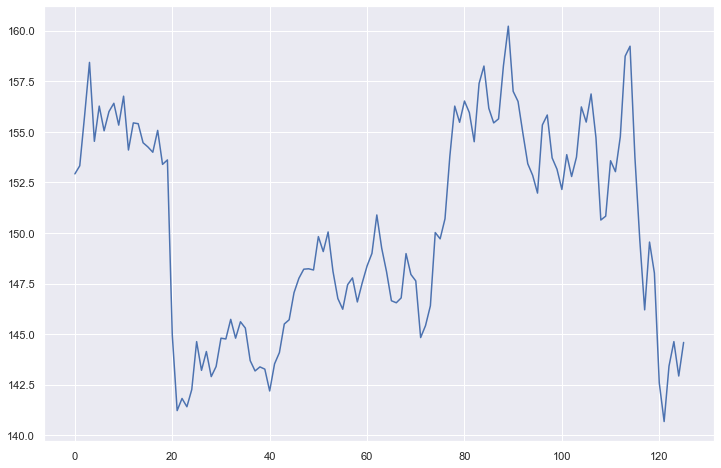

In [28]:
test_df[6].plot(figsize=(12,8))

In [29]:
test_df.iloc[:, 4:9]

,4,5,6,7,8
0,150.7,153.275,152.92,100388,152.18
1,151.35,153.73,153.32,55547,153.67
2,152.46,156,155.81,199370,153.95
3,154.8,158.44,158.43,127431,156
4,154.44,159.05,154.53,97661,158.6
...,...,...,...,...,...
121,140.68,143.72,140.68,44845,141.81
122,138.65,144.18,143.42,51748,140.95
123,140.01,144.63,144.63,72017,142.63
124,141.1,147.665,142.93,62322,145.1


In [30]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
# tf.compat.v1.random.set_random_seed(1234)

In [32]:
# 数据标准化
minmax = MinMaxScaler().fit(test_df.iloc[:, 4:9].astype('float32')) # Close index
df_log = minmax.transform(test_df.iloc[:, 4:9].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()
print(df_log)

            0         1         2         3         4
0    0.657393  0.509020  0.626407  0.444272  0.573689
1    0.692854  0.532474  0.646878  0.216083  0.647379
2    0.753410  0.649484  0.774309  0.947977  0.661226
3    0.881070  0.775258  0.908392  0.581890  0.762611
4    0.861430  0.806701  0.708802  0.430395  0.891197
..        ...       ...       ...       ...       ...
121  0.110747  0.016495  0.000000  0.161622  0.060831
122  0.000000  0.040206  0.140225  0.196750  0.018299
123  0.074195  0.063403  0.202150  0.299896  0.101385
124  0.133661  0.219845  0.115148  0.250560  0.223541
125  0.167486  0.094588  0.200102  0.263857  0.145401

[126 rows x 5 columns]


## 3.构建预测模型

### 3.1 设置模型参数

In [33]:
# 设置模型参数
simulation_size = 1
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 30  # 预测未来的时间
learning_rate = 0.01  # 学习率

df_train = df_log
test_df.shape, df_train.shape

((126, 9), (126, 5))

### 3.2 定义模型并使用模型进行预测

In [34]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [35]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(test_df.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * 2 * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * 2 * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.4)
    
    return deep_future

In [36]:
# 输出结果
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:

train loop: 100%|████████████████████████████████████████████| 300/300 [01:00<00:00,  4.98it/s, acc=95.8, cost=0.00444]


In [37]:
test_df.iloc[:,1]

0      2018-07-02
1      2018-07-03
2      2018-07-05
3      2018-07-06
4      2018-07-09
          ...    
121    2018-12-24
122    2018-12-26
123    2018-12-27
124    2018-12-28
125    2018-12-31
Name: 1, Length: 126, dtype: object

In [38]:
# 时间信息处理，作为横轴绘图
date_ori = pd.to_datetime(test_df.iloc[:,1]).tolist()
print(date_ori)
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(days = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d').tolist()
date_ori[0]

[Timestamp('2018-07-02 00:00:00'), Timestamp('2018-07-03 00:00:00'), Timestamp('2018-07-05 00:00:00'), Timestamp('2018-07-06 00:00:00'), Timestamp('2018-07-09 00:00:00'), Timestamp('2018-07-10 00:00:00'), Timestamp('2018-07-11 00:00:00'), Timestamp('2018-07-12 00:00:00'), Timestamp('2018-07-13 00:00:00'), Timestamp('2018-07-16 00:00:00'), Timestamp('2018-07-17 00:00:00'), Timestamp('2018-07-18 00:00:00'), Timestamp('2018-07-19 00:00:00'), Timestamp('2018-07-20 00:00:00'), Timestamp('2018-07-23 00:00:00'), Timestamp('2018-07-24 00:00:00'), Timestamp('2018-07-25 00:00:00'), Timestamp('2018-07-26 00:00:00'), Timestamp('2018-07-27 00:00:00'), Timestamp('2018-07-30 00:00:00'), Timestamp('2018-07-31 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2018-08-02 00:00:00'), Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-06 00:00:00'), Timestamp('2018-08-07 00:00:00'), Timestamp('2018-08-08 00:00:00'), Timestamp('2018-08-09 00:00:00'), Timestamp('2018-08-10 00:00:00'), Timestamp('20

'2018-07-02'

In [39]:
accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(test_df[6])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(test_df[6]) * 2).sum() == 0:
        accepted_results.append(r)
len(accepted_results)

1

In [40]:
np.array(test_df[6])

array([152.92, 153.32001, 155.81, 158.42999, 154.53, 156.27, 155.05,
       156.0, 156.41, 155.33, 156.75999, 154.10001, 155.44, 155.39999,
       154.46001, 154.25, 153.99001, 155.07001, 153.39, 153.61, 144.96001,
       141.22, 141.82001, 141.41, 142.25999, 144.63, 143.21001, 144.14,
       142.89999, 143.39999, 144.8, 144.75999, 145.73, 144.8, 145.61,
       145.3, 143.69, 143.17999, 143.38, 143.27, 142.19, 143.53, 144.09,
       145.5, 145.71001, 147.05, 147.75999, 148.21001, 148.23, 148.17,
       149.82001, 149.08, 150.05, 148.10001, 146.75999, 146.23, 147.44,
       147.78, 146.59, 147.53, 148.37, 148.99001, 150.89, 149.25, 148.08,
       146.64999, 146.55, 146.78999, 148.98, 147.95, 147.63, 144.83,
       145.42, 146.39999, 150.02, 149.71001, 150.7, 153.8, 156.27, 155.47,
       156.52, 155.95, 154.50999, 157.39, 158.25, 156.16, 155.44, 155.64,
       158.25999, 160.22, 157.0, 156.5, 154.92, 153.42, 152.85001, 151.97,
       155.34, 155.83, 153.71001, 153.14999, 152.14999, 153.

### 3.3 模型预测结果可视化

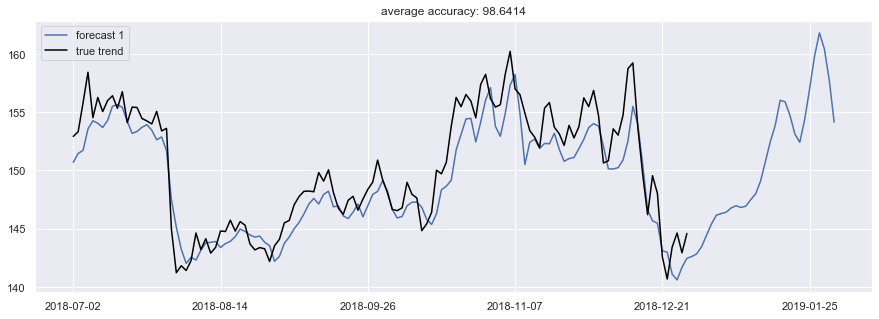

In [42]:
# 预测结果可视化
accuracies = [calculate_accuracy(test_df[6].values, r[:-test_size]) for r in accepted_results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    #print(no)
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(np.array(test_df[6]), label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::30], date_ori[::30])

plt.show()

## 4.验证模型预测能力

### 4.1 处理公司名称的缩写数据

In [43]:
Tickle_info = share_df.iloc[:, 2]
Tickle_info = np.array(Tickle_info)

print(Tickle_info)

['JJSF' 'JJSF' 'JJSF' ... 'TSLA' 'TSLA' 'TSLA']


In [44]:
Tickle_info = Tickle_info.tolist()
Tickle_kind = list(set(Tickle_info))
Tickle_kind.sort(key=Tickle_info.index)
print(Tickle_kind)

['JJSF', 'DGSE', 'PLXS', 'RMCF', 'HNGR', 'ADX', 'ORCL', 'MSFT', 'AADR', 'TROW', 'HON', 'AMRC', 'AKRX', 'TECD', 'RGEN', 'AT', 'FUND', 'BWXT', 'ESBK', 'BWINB', 'PTVCB', 'INDB', 'DSS', 'DLHC', 'CLDX', 'SIGM', 'HVT', 'CY', 'TMP', 'BCPC', 'XOMA', 'DJCO', 'AMAG', 'TCF', 'ASTE', 'NAVG', 'WERN', 'SKYW', 'FRPH', 'REFR', 'AMWD', 'TWMC', 'ADM', 'AAN', 'VIVO', 'CLFD', 'PDEX', 'WTS', 'FNB', 'LAKE', 'PTSI', 'ACET', 'CYAN', 'EHC', 'FISV', 'FCNCA', 'BKTI', 'BKSC', 'HTLD', 'CYTR', 'OSUR', 'CAL', 'BC', 'DXYN', 'UIS', 'WSFS', 'ITIC', 'CERN', 'FFKT', 'WBS', 'MKL', 'CDR', 'AXGN', 'WPZ', 'FLIC', 'FBP', 'PMD', 'AVD', 'PLAB', 'CRMT', 'GASL', 'ARGO', 'OFG', 'RETL', 'CATO', 'FBNC', 'ICCC', 'WSBC', 'KO', 'SAFM', 'CNBKA', 'ECT', 'SCIN', 'AIRT', 'UBSI', 'ENV', 'DXLG', 'KOOL', 'WASH', 'CDNS', 'ED', 'LIT', 'NHLD', 'CHCO', 'EBIX', 'CECE', 'CPSH', 'FICO', 'CNMD', 'CELG', 'HBNC', 'ATU', 'ATRI', 'SNFCA', 'XRAY', 'FAST', 'CPF', 'HRTX', 'LABL', 'CRK', 'NAII', 'GDOT', 'DTE', 'MATX', 'IMKTA', 'CBM', 'AIN', 'DGICB', 'IIVI', 

In [45]:
print(Tickle_kind[0:5])

['JJSF', 'DGSE', 'PLXS', 'RMCF', 'HNGR']


In [46]:
Tickle_info = np.array(Tickle_info)
kinddata = []
for i in range(5):
    kinddata.append(sum(Tickle_info == Tickle_kind[i]))
print(kinddata)

[126, 125, 126, 126, 76]


In [47]:
location_info = []
location_info.append(0)
location_info.append(kinddata[0])
location = kinddata[0]
for i in range(1,5):
    print(i)
    location += kinddata[i]
    location_info.append(location)
print(location_info)

1
2
3
4
[0, 126, 251, 377, 503, 579]


### 4.2 选择五个公司的数据进行预测

       0           1     2                       3        4        5       6  \
5  10026  2018-07-10  JJSF  J & J SNACK FOODS CORP  154.065   156.48  156.27   
6  10026  2018-07-11  JJSF  J & J SNACK FOODS CORP   153.67   157.79  155.05   
7  10026  2018-07-12  JJSF  J & J SNACK FOODS CORP   154.36  156.405     156   
8  10026  2018-07-13  JJSF  J & J SNACK FOODS CORP   155.45  158.015  156.41   
9  10026  2018-07-16  JJSF  J & J SNACK FOODS CORP  154.565   156.95  155.33   

       7       8  
5  73893  154.76  
6  64701     156  
7  72010  155.81  
8  42659  155.64  
9  59584  156.63  
(121, 9) (121, 5)
simulation 1


train loop: 100%|████████████████████████████████████████████| 300/300 [00:58<00:00,  5.17it/s, acc=95.3, cost=0.00608]


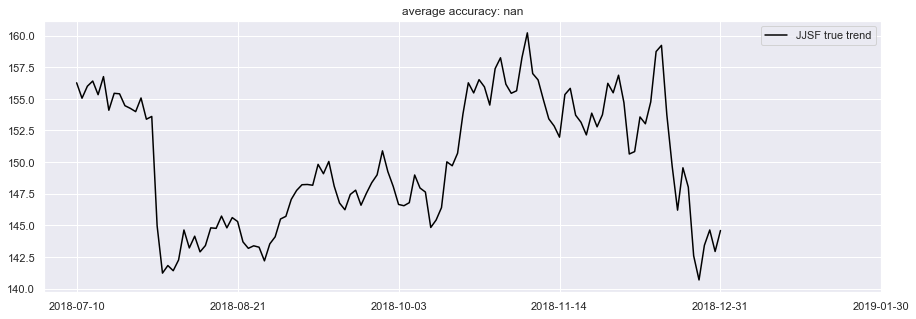

         0           1     2                      3      4        5       6  \
131  10028  2018-07-10  DGSE  D G S E COMPANIES INC  0.771     0.78   0.775   
132  10028  2018-07-11  DGSE  D G S E COMPANIES INC   0.75  0.77514    0.75   
133  10028  2018-07-12  DGSE  D G S E COMPANIES INC   0.75     0.75    0.75   
134  10028  2018-07-13  DGSE  D G S E COMPANIES INC   0.74     0.75  0.7401   
135  10028  2018-07-16  DGSE  D G S E COMPANIES INC   0.74   0.7501    0.74   

         7       8  
131  32580    0.78  
132  16977   0.775  
133    775    0.75  
134   7010    0.75  
135    702  0.7501  
(120, 9) (120, 5)
simulation 1


train loop: 100%|██████████████████████████████████████████████| 300/300 [00:57<00:00,  5.24it/s, acc=93.1, cost=0.012]


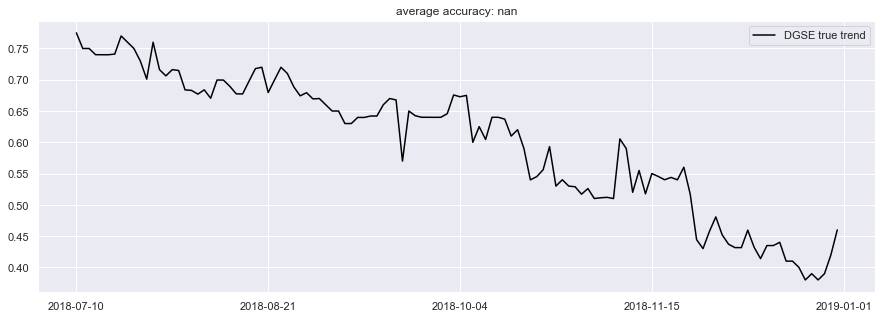

         0           1     2            3        4      5      6       7  \
256  10032  2018-07-10  PLXS  PLEXUS CORP    62.86   63.7  63.17   99451   
257  10032  2018-07-11  PLXS  PLEXUS CORP    61.55  63.57  61.69  105761   
258  10032  2018-07-12  PLXS  PLEXUS CORP  61.3325  62.52  62.15  104297   
259  10032  2018-07-13  PLXS  PLEXUS CORP     61.8  62.68  61.98   80424   
260  10032  2018-07-16  PLXS  PLEXUS CORP    61.74   62.3  61.97  184534   

         8  
256  63.24  
257  62.71  
258  61.95  
259  62.19  
260  61.98  
(121, 9) (121, 5)
simulation 1


train loop: 100%|████████████████████████████████████████████| 300/300 [00:57<00:00,  5.24it/s, acc=97.2, cost=0.00492]


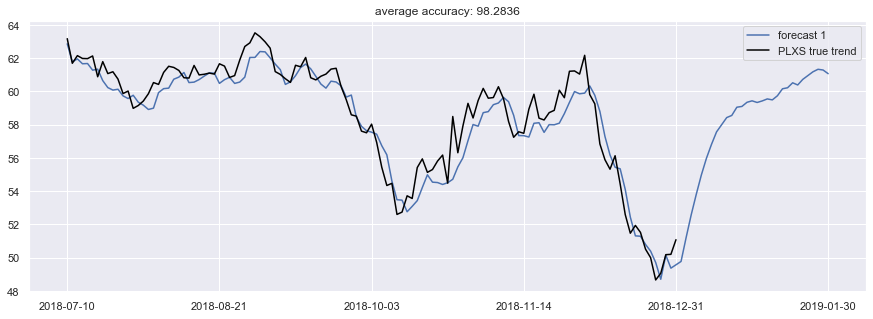

         0           1     2                                3      4        5  \
382  10044  2018-07-10  RMCF  ROCKY MOUNTAIN CHOC FAC INC NEW     11  11.2699   
383  10044  2018-07-11  RMCF  ROCKY MOUNTAIN CHOC FAC INC NEW     11     11.1   
384  10044  2018-07-12  RMCF  ROCKY MOUNTAIN CHOC FAC INC NEW  10.91    11.14   
385  10044  2018-07-13  RMCF  ROCKY MOUNTAIN CHOC FAC INC NEW  10.96     11.1   
386  10044  2018-07-16  RMCF  ROCKY MOUNTAIN CHOC FAC INC NEW     11    11.05   

         6      7      8  
382  11.02  18838  11.17  
383  11.09  16117     11  
384  11.04   8552  10.91  
385   11.1   3614  10.96  
386  11.05   8940     11  
(121, 9) (121, 5)
simulation 1


train loop: 100%|████████████████████████████████████████████| 300/300 [01:00<00:00,  4.93it/s, acc=96.6, cost=0.00549]


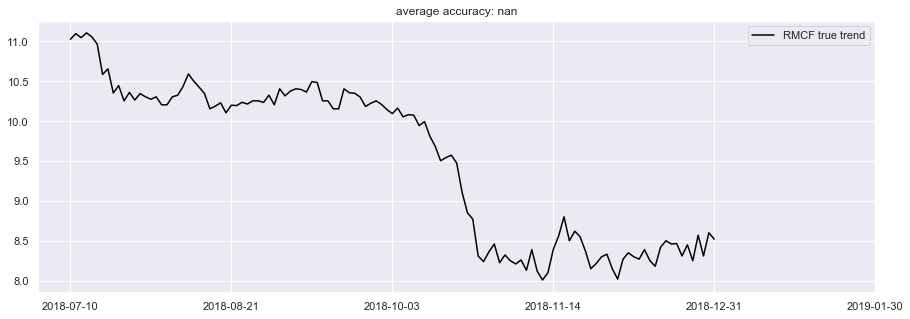

         0           1     2           3       4      5      6            7  \
508  10051  2018-09-19  HNGR  HANGER INC   21.49  22.35  21.69        76145   
509  10051  2018-09-20  HNGR  HANGER INC   21.25  21.82  21.82       131873   
510  10051  2018-09-21  HNGR  HANGER INC   21.28  22.07  21.57        28378   
511  10051  2018-09-24  HNGR  HANGER INC   21.05  21.66  21.05       214808   
512  10051  2018-09-25  HNGR  HANGER INC  20.771  22.53  20.93  1.88386e+06   

         8  
508   21.8  
509  21.69  
510  22.07  
511  21.52  
512     21  
(71, 9) (71, 5)
simulation 1


train loop: 100%|██████████████████████████████████████████████| 300/300 [00:36<00:00,  8.29it/s, acc=96, cost=0.00413]


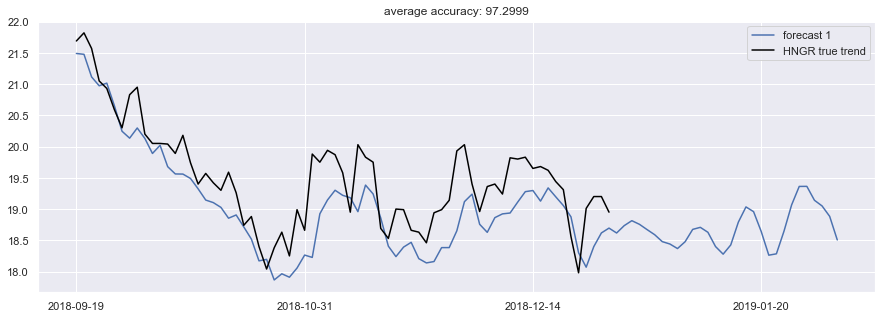

In [48]:
for n in range(1,6):
    #print(n)
    test_df = share_df[location_info[n-1] + 5 : location_info[n]]
    print(test_df.head())
    #plt.figure()
    #test_df[6].plot(figsize=(12,8))
    #plt.show()
    # 数据标准化
    minmax = MinMaxScaler().fit(test_df.iloc[:, 4:9].astype('float32')) # Close index
    df_log = minmax.transform(test_df.iloc[:, 4:9].astype('float32')) # Close index
    df_log = pd.DataFrame(df_log)
    df_log.head()
    #print(df_log)
    
    # 设置模型参数
    simulation_size = 1
    num_layers = 1
    size_layer = 128
    timestamp = 5
    epoch = 300
    dropout_rate = 0.8
    test_size = 30
    learning_rate = 0.01

    df_train = df_log
    print(test_df.shape, df_train.shape)
    
    # 输出结果
    results = []
    for j in range(simulation_size):
        print('simulation %d'%(j + 1))
        results.append(forecast())
        
    # 时间信息处理，作为横轴绘图
    date_ori = pd.to_datetime(test_df.iloc[:,1]).tolist()
    # print(date_ori)
    for i in range(test_size):
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d').tolist()
    date_ori[-5:]
    
    accepted_results = []
    for r in results:
        if (np.array(r[-test_size:]) < np.min(test_df[6])).sum() == 0 and \
        (np.array(r[-test_size:]) > np.max(test_df[6]) * 2).sum() == 0:
            accepted_results.append(r)
    print(len(accepted_results))
    
    # 预测结果可视化
    accuracies = [calculate_accuracy(test_df[6].values, r[:-test_size]) for r in accepted_results]

    plt.figure(figsize = (15, 5))
    for no, r in enumerate(accepted_results):
        plt.plot(r, label = 'forecast %d'%(no + 1))
    plt.plot(np.array(test_df[6]), label = Tickle_kind[n-1]+' true trend', c = 'black')
    plt.legend()
    plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

    x_range_future = np.arange(len(results[0]))
    plt.xticks(x_range_future[::30], date_ori[::30])

    plt.show()

### 4.3 随机选择一个公司的数据进行预测

In [63]:
n = np.random.randint(len(Tickle_kind))
print("n =",n)
random_tickle = Tickle_kind[n]
print(random_tickle)
tickle_num = sum(Tickle_info == random_tickle)
print(tickle_num)
for i in range(len(Tickle_info)):
    if Tickle_info[i] == random_tickle:
        break
print(i)
start_location = i+5
end_location = i + tickle_num 

n = 1686
HIFR
126
203248


In [64]:
test_df = share_df[start_location:end_location]
test_df.head()

,0,1,2,3,4,5,6,7,8
203253,15159,2018-07-10,HIFR,INFRAREIT INC,21.65,22.07,21.96,202551,21.76
203254,15159,2018-07-11,HIFR,INFRAREIT INC,21.7972,22.17,21.87,105428,22.02
203255,15159,2018-07-12,HIFR,INFRAREIT INC,21.79,22.19,22.14,152739,21.9
203256,15159,2018-07-13,HIFR,INFRAREIT INC,21.98,22.21,21.99,100723,22.13
203257,15159,2018-07-16,HIFR,INFRAREIT INC,21.72,22.08,21.81,174343,22.02


In [65]:
test_df.nunique()

0      1
1    121
2      1
3      1
4     80
5     80
6     74
7    121
8     72
dtype: int64

In [66]:
# 数据标准化
minmax = MinMaxScaler().fit(test_df.iloc[:, 4:9].astype('float32')) # Close index
df_log = minmax.transform(test_df.iloc[:, 4:9].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()
print(df_log)

            0         1         2         3         4
0    0.579545  0.546428  0.613970  0.013746  0.546154
1    0.635302  0.582143  0.580883  0.005577  0.646154
2    0.632576  0.589286  0.680147  0.009557  0.600000
3    0.704545  0.596428  0.625000  0.005181  0.688461
4    0.606060  0.550000  0.558823  0.011374  0.646154
..        ...       ...       ...       ...       ...
116  0.367424  0.257143  0.297794  0.017350  0.319231
117  0.390151  0.250000  0.334559  0.024121  0.315384
118  0.376894  0.255356  0.345588  0.028588  0.330770
119  0.321969  0.224999  0.261029  0.033026  0.315384
120  0.314394  0.192857  0.268382  0.019061  0.253847

[121 rows x 5 columns]


In [67]:
# 设置模型参数
simulation_size = 1
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
test_size = 30  # 预测未来的时间
learning_rate = 0.01  # 学习率

df_train = df_log
test_df.shape, df_train.shape

((121, 9), (121, 5))

simulation 1


train loop: 100%|████████████████████████████████████████████| 300/300 [00:59<00:00,  5.07it/s, acc=94.7, cost=0.00717]


[Timestamp('2018-07-10 00:00:00'), Timestamp('2018-07-11 00:00:00'), Timestamp('2018-07-12 00:00:00'), Timestamp('2018-07-13 00:00:00'), Timestamp('2018-07-16 00:00:00'), Timestamp('2018-07-17 00:00:00'), Timestamp('2018-07-18 00:00:00'), Timestamp('2018-07-19 00:00:00'), Timestamp('2018-07-20 00:00:00'), Timestamp('2018-07-23 00:00:00'), Timestamp('2018-07-24 00:00:00'), Timestamp('2018-07-25 00:00:00'), Timestamp('2018-07-26 00:00:00'), Timestamp('2018-07-27 00:00:00'), Timestamp('2018-07-30 00:00:00'), Timestamp('2018-07-31 00:00:00'), Timestamp('2018-08-01 00:00:00'), Timestamp('2018-08-02 00:00:00'), Timestamp('2018-08-03 00:00:00'), Timestamp('2018-08-06 00:00:00'), Timestamp('2018-08-07 00:00:00'), Timestamp('2018-08-08 00:00:00'), Timestamp('2018-08-09 00:00:00'), Timestamp('2018-08-10 00:00:00'), Timestamp('2018-08-13 00:00:00'), Timestamp('2018-08-14 00:00:00'), Timestamp('2018-08-15 00:00:00'), Timestamp('2018-08-16 00:00:00'), Timestamp('2018-08-17 00:00:00'), Timestamp('20

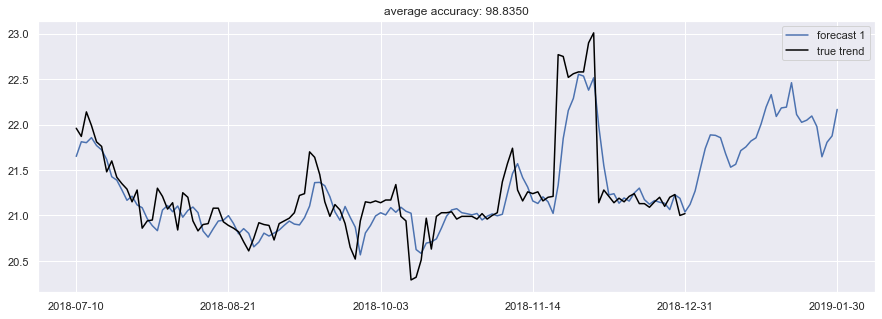

In [68]:
# 输出结果
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())
    
# 时间信息处理，作为横轴绘图
date_ori = pd.to_datetime(test_df.iloc[:,1]).tolist()
print(date_ori)
for i in range(test_size):
    date_ori.append(date_ori[-1] + timedelta(days = 1))
date_ori = pd.Series(date_ori).dt.strftime(date_format = '%Y-%m-%d').tolist()
date_ori[0]

accepted_results = []
for r in results:
    if (np.array(r[-test_size:]) < np.min(test_df[6])).sum() == 0 and \
    (np.array(r[-test_size:]) > np.max(test_df[6]) * 2).sum() == 0:
        accepted_results.append(r)
print(len(accepted_results))

# 预测结果可视化
accuracies = [calculate_accuracy(test_df[6].values, r[:-test_size]) for r in accepted_results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(accepted_results):
    #print(no)
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(np.array(test_df[6]), label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))

x_range_future = np.arange(len(results[0]))
plt.xticks(x_range_future[::30], date_ori[::30])

plt.show()